In [1]:
# Import Require libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import plot_model, Sequence

In [2]:
 !pip install kmodes

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks (2)/Intership/OLA-AND-UBER-USERS-DATABASE-2-LACS.xlsx',sheet_name = 'Data')

## Data Preprocessing

In [5]:
data

,A,Rate,Time,Cab Type,Charge Description,Name,Time.1,Day,Email ids,Contact No,Address,City,State
0,25531,7 RS,8 Min,Mini,100rs 4 KM /11 Afer 4,sandesh ms,12:22:50,Friday,sandeshm521@gmail.com,9886179280,"#236, 1st D cross, 5th Main, LIC colony, Srira...",Mysore,Karnataka
1,3900,7 RS,2 Min,Micro,100rs 4 KM /13 Afer 4,KOUSIK GHOSH,18:27:41,Wednesday,kousik_ghosh@indiatimes.com,9886166374,habra staff quarters po hawra,24 PARAGANAS,NaN
2,8200,7 RS,2 Min,Micro,100rs 4 KM /13 Afer 4,SUPARNO CHAUDHURI,11:50:42,Wednesday,suparno2k@yahoo.com,9886366152,FLAT NO 6 NAIHATI,24 PARAGANAS,NaN
3,1700,7 RS,2 Min,Micro,100rs 4 KM /13 Afer 4,NASRUL HAQUE,22:06:26,Wednesday,NASRUL_HAQUE@aol.com,9903690681,"HOLDING-23,BLOCK-3,JAGATDAL",24 PARAGANAS,NaN
4,1600,7 RS,8 Min,Mini,100rs 4 KM /11 Afer 4,JAMIULLAH KHAN,22:20:07,Thursday,JAMIULLAH.KHAN@gmail.com,9903797512,"HOLDING NO-55,BL-7,MATIBHAVAN",24 PARAGANAS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184701,2200,7 RS,2 Min,Micro,100rs 4 KM /13 Afer 4,SUSANTA KUMAR MOHAPATRA,17:58:30,Saturday,susanta.mohapatra@rediffmail.com,9998722066,NaN,Other States,NaN
184702,10000,7 RS,8 Min,Mini,100rs 4 KM /11 Afer 4,SHAKUNTLABEN SANJAYBHAI P,17:29:03,Thursday,shakuntlaben.p@aol.com,9998746980,NaN,Other States,NaN
184703,3200,7 RS,8 Min,Mini,100rs 4 KM /11 Afer 4,RAKESH SINGH,14:27:49,Friday,rakesh.singh@rediffmail.com,9998897510,NaN,Other States,NaN
184704,700,7 RS,8 Min,Mini,100rs 4 KM /11 Afer 4,ATIT JAYANTKUMAR SUTARIYA,22:35:40,Sunday,atit.sutariya@indiatimes.com,9998918759,NaN,Other States,NaN


In [6]:
print(f'The Shape of dataset is: {data.shape}')

The Shape of dataset is: (184706, 13)


In [7]:
## Finding missing dataset
data.isna().sum()

A                         0
Rate                  10707
Time                    166
Cab Type                166
Charge Description      166
Name                      0
Time.1                    0
Day                       0
Email ids                 4
Contact No                0
Address               10145
City                      0
State                   648
dtype: int64

In [8]:
# To see unique value in column related to missing values

print(f"The unique value in 'Rate' is \n { data['Rate'].value_counts()}")
print(f"\nThe unique value in 'Time' is \n { data['Time'].value_counts()}")
print(f"\nThe unique value in 'Cab Type' is \n { data['Cab Type'].value_counts()}")
print(f"\nThe unique value in 'Charge Description' is \n { data['Charge Description'].value_counts()}")
print(f"\nThe unique value in 'Address' is \n { data['Address'].value_counts()}")
print(f"\nThe unique value in 'State' is \n { data['State'].value_counts()}")

The unique value in 'Rate' is 
 7 RS     173999
Name: Rate, dtype: int64

The unique value in 'Time' is 
 8 Min     97873
2 Min     86667
Name: Time, dtype: int64

The unique value in 'Cab Type' is 
 Mini     97873
Micro    76126
prime    10541
Name: Cab Type, dtype: int64

The unique value in 'Charge Description' is 
 100rs 4 KM /11 Afer 4    97873
100rs 4 KM /13 Afer 4    76126
59/1/2 - 8rs /2 km       10541
Name: Charge Description, dtype: int64

The unique value in 'Address' is 
 ELECTRONIC CITY                  631
HOSUR ROAD                       438
ELECTRONICS CITY                 244
NO-44 ELECTRONIC CITY            224
44 ELECTRONIC CITY               188
                                ... 
mahalakshmi street                 1
NO-3/472 MUGAPPAIR EAST            1
MENEAMBAKKAM AIRPORT               1
NO 108D PETIT PALACE               1
22 CAMAC STREET,ZONAL OFFICE,      1
Name: Address, Length: 148778, dtype: int64

The unique value in 'State' is 
 Karnataka                 

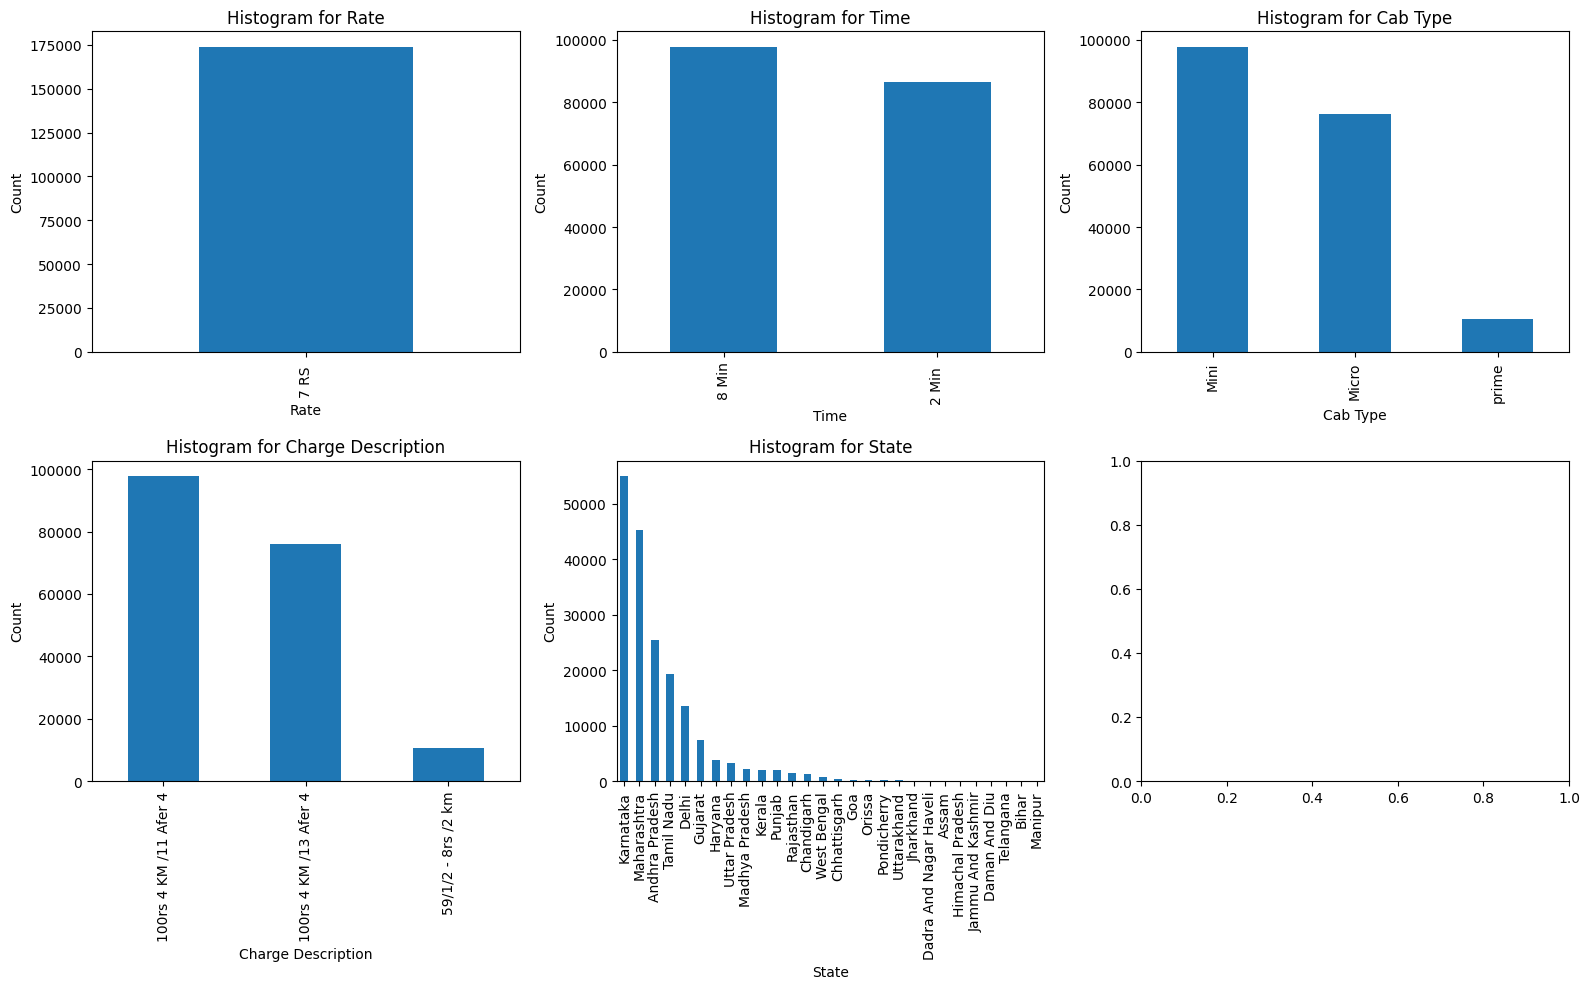

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns for which you want to create histograms
columns_for_histograms = ['Rate', 'Time', 'Cab Type', 'Charge Description', 'State']

# Create a 2x3 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column and create histograms
for i, col in enumerate(columns_for_histograms):
    data[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
data['Address'].nunique()

148778

In [11]:
## Remove some columns which has large either missing value/unique value or both
data.drop(['Rate','Time','Address' ],axis = 1, inplace =True)

In [12]:
data

,A,Cab Type,Charge Description,Name,Time.1,Day,Email ids,Contact No,City,State
0,25531,Mini,100rs 4 KM /11 Afer 4,sandesh ms,12:22:50,Friday,sandeshm521@gmail.com,9886179280,Mysore,Karnataka
1,3900,Micro,100rs 4 KM /13 Afer 4,KOUSIK GHOSH,18:27:41,Wednesday,kousik_ghosh@indiatimes.com,9886166374,24 PARAGANAS,NaN
2,8200,Micro,100rs 4 KM /13 Afer 4,SUPARNO CHAUDHURI,11:50:42,Wednesday,suparno2k@yahoo.com,9886366152,24 PARAGANAS,NaN
3,1700,Micro,100rs 4 KM /13 Afer 4,NASRUL HAQUE,22:06:26,Wednesday,NASRUL_HAQUE@aol.com,9903690681,24 PARAGANAS,NaN
4,1600,Mini,100rs 4 KM /11 Afer 4,JAMIULLAH KHAN,22:20:07,Thursday,JAMIULLAH.KHAN@gmail.com,9903797512,24 PARAGANAS,NaN
...,...,...,...,...,...,...,...,...,...,...
184701,2200,Micro,100rs 4 KM /13 Afer 4,SUSANTA KUMAR MOHAPATRA,17:58:30,Saturday,susanta.mohapatra@rediffmail.com,9998722066,Other States,NaN
184702,10000,Mini,100rs 4 KM /11 Afer 4,SHAKUNTLABEN SANJAYBHAI P,17:29:03,Thursday,shakuntlaben.p@aol.com,9998746980,Other States,NaN
184703,3200,Mini,100rs 4 KM /11 Afer 4,RAKESH SINGH,14:27:49,Friday,rakesh.singh@rediffmail.com,9998897510,Other States,NaN
184704,700,Mini,100rs 4 KM /11 Afer 4,ATIT JAYANTKUMAR SUTARIYA,22:35:40,Sunday,atit.sutariya@indiatimes.com,9998918759,Other States,NaN


In [13]:
# Removing unneccesary columns like "A", "Name","Email ids","Contact No"
data.drop(['A','Name','Email ids', 'Contact No'],axis = 1, inplace =True)

In [14]:
data

,Cab Type,Charge Description,Time.1,Day,City,State
0,Mini,100rs 4 KM /11 Afer 4,12:22:50,Friday,Mysore,Karnataka
1,Micro,100rs 4 KM /13 Afer 4,18:27:41,Wednesday,24 PARAGANAS,NaN
2,Micro,100rs 4 KM /13 Afer 4,11:50:42,Wednesday,24 PARAGANAS,NaN
3,Micro,100rs 4 KM /13 Afer 4,22:06:26,Wednesday,24 PARAGANAS,NaN
4,Mini,100rs 4 KM /11 Afer 4,22:20:07,Thursday,24 PARAGANAS,NaN
...,...,...,...,...,...,...
184701,Micro,100rs 4 KM /13 Afer 4,17:58:30,Saturday,Other States,NaN
184702,Mini,100rs 4 KM /11 Afer 4,17:29:03,Thursday,Other States,NaN
184703,Mini,100rs 4 KM /11 Afer 4,14:27:49,Friday,Other States,NaN
184704,Mini,100rs 4 KM /11 Afer 4,22:35:40,Sunday,Other States,NaN


In [15]:
data.loc[data['City'] == "Other States", 'State'] = 'Other States'
data.loc[data['City'] == 'Mumbai','City'] = 'MUMBAI'

In [16]:
data.isna().sum()

Cab Type              166
Charge Description    166
Time.1                  0
Day                     0
City                    0
State                 103
dtype: int64

Here total missing value remain 435 which is 0.24% of 184706 dataset. Generally, if less than 5% of values are missing then it is acceptable to ignore them.That missing value not significant it's better to drop it.

In [17]:
data.dropna(inplace = True)

In [18]:
data.isna().sum()

Cab Type              0
Charge Description    0
Time.1                0
Day                   0
City                  0
State                 0
dtype: int64

In [19]:
data.reset_index()

,index,Cab Type,Charge Description,Time.1,Day,City,State
0,0,Mini,100rs 4 KM /11 Afer 4,12:22:50,Friday,Mysore,Karnataka
1,7,Mini,100rs 4 KM /11 Afer 4,16:09:25,Sunday,Delhi,Delhi
2,8,Mini,100rs 4 KM /11 Afer 4,17:58:30,Tuesday,AGRA,Uttar Pradesh
3,9,Mini,100rs 4 KM /11 Afer 4,11:22:32,Monday,AGRA,Uttar Pradesh
4,10,Mini,100rs 4 KM /11 Afer 4,11:50:42,Tuesday,AGRA,Uttar Pradesh
...,...,...,...,...,...,...,...
184432,184701,Micro,100rs 4 KM /13 Afer 4,17:58:30,Saturday,Other States,Other States
184433,184702,Mini,100rs 4 KM /11 Afer 4,17:29:03,Thursday,Other States,Other States
184434,184703,Mini,100rs 4 KM /11 Afer 4,14:27:49,Friday,Other States,Other States
184435,184704,Mini,100rs 4 KM /11 Afer 4,22:35:40,Sunday,Other States,Other States


In [20]:
#data.drop(['index'],axis=1,inplace= True)

# Data Transformation

### 1. Discretization

In [21]:
data.head()

,Cab Type,Charge Description,Time.1,Day,City,State
0,Mini,100rs 4 KM /11 Afer 4,12:22:50,Friday,Mysore,Karnataka
7,Mini,100rs 4 KM /11 Afer 4,16:09:25,Sunday,Delhi,Delhi
8,Mini,100rs 4 KM /11 Afer 4,17:58:30,Tuesday,AGRA,Uttar Pradesh
9,Mini,100rs 4 KM /11 Afer 4,11:22:32,Monday,AGRA,Uttar Pradesh
10,Mini,100rs 4 KM /11 Afer 4,11:50:42,Tuesday,AGRA,Uttar Pradesh


In [22]:
for i in data.columns:
   print(f"\nThe unique value in column '{i}' are \n{data[i].value_counts()} \n--------------------------------------------------------------------------------------")


The unique value in column 'Cab Type' are 
Mini     97829
Micro    76071
prime    10537
Name: Cab Type, dtype: int64 
--------------------------------------------------------------------------------------

The unique value in column 'Charge Description' are 
100rs 4 KM /11 Afer 4    97829
100rs 4 KM /13 Afer 4    76071
59/1/2 - 8rs /2 km       10537
Name: Charge Description, dtype: int64 
--------------------------------------------------------------------------------------

The unique value in column 'Time.1' are 
17:10:17    3069
15:29:32    3061
13:01:24    3043
19:05:17    3039
16:09:25    3028
            ... 
15:45:02    1135
22:06:26    1108
10:45:45    1065
14:05:08    1041
15:08:31     749
Name: Time.1, Length: 78, dtype: int64 
--------------------------------------------------------------------------------------

The unique value in column 'Day' are 
Sunday       37098
Tuesday      34038
Friday       30700
Saturday     23388
Wednesday    21053
Monday       20571
Thursday   

In [23]:
## ORDINAL ENCODING
# Define some columns as oridnal like "Cab Type", "day", "Time"
cab_map = {"Mini": 0, "Micro": 1, "prime": 2}
day_map = {'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
data["Cab Type_encoded"] = data["Cab Type"].map(cab_map)
data["Day_encoded"] = data["Day"].map(day_map)
print(data)

       Cab Type     Charge Description    Time.1       Day          City  \
0          Mini  100rs 4 KM /11 Afer 4  12:22:50    Friday        Mysore   
7          Mini  100rs 4 KM /11 Afer 4  16:09:25    Sunday         Delhi   
8          Mini  100rs 4 KM /11 Afer 4  17:58:30   Tuesday          AGRA   
9          Mini  100rs 4 KM /11 Afer 4  11:22:32    Monday          AGRA   
10         Mini  100rs 4 KM /11 Afer 4  11:50:42   Tuesday          AGRA   
...         ...                    ...       ...       ...           ...   
184701    Micro  100rs 4 KM /13 Afer 4  17:58:30  Saturday  Other States   
184702     Mini  100rs 4 KM /11 Afer 4  17:29:03  Thursday  Other States   
184703     Mini  100rs 4 KM /11 Afer 4  14:27:49    Friday  Other States   
184704     Mini  100rs 4 KM /11 Afer 4  22:35:40    Sunday  Other States   
184705     Mini  100rs 4 KM /11 Afer 4  23:01:12    Sunday  Other States   

                State  Cab Type_encoded  Day_encoded  
0           Karnataka           

In [24]:
import datetime

# Convert "Time" column to string if it contains datetime.time objects
data['Time.1'] = data['Time.1'].apply(lambda x: x.strftime('%H:%M:%S') if isinstance(x, datetime.time) else x)

# Convert the "Time" column to a pandas datetime object
data['Time.1'] = pd.to_datetime(data['Time.1'])

# Extract the hour, minute, and second components and combine them to create an ordinal representation
data['Time_order'] = data['Time.1'].dt.hour * 3600 + data['Time.1'].dt.minute * 60 + data['Time.1'].dt.second

print(data)

       Cab Type     Charge Description              Time.1       Day  \
0          Mini  100rs 4 KM /11 Afer 4 2023-07-29 12:22:50    Friday   
7          Mini  100rs 4 KM /11 Afer 4 2023-07-29 16:09:25    Sunday   
8          Mini  100rs 4 KM /11 Afer 4 2023-07-29 17:58:30   Tuesday   
9          Mini  100rs 4 KM /11 Afer 4 2023-07-29 11:22:32    Monday   
10         Mini  100rs 4 KM /11 Afer 4 2023-07-29 11:50:42   Tuesday   
...         ...                    ...                 ...       ...   
184701    Micro  100rs 4 KM /13 Afer 4 2023-07-29 17:58:30  Saturday   
184702     Mini  100rs 4 KM /11 Afer 4 2023-07-29 17:29:03  Thursday   
184703     Mini  100rs 4 KM /11 Afer 4 2023-07-29 14:27:49    Friday   
184704     Mini  100rs 4 KM /11 Afer 4 2023-07-29 22:35:40    Sunday   
184705     Mini  100rs 4 KM /11 Afer 4 2023-07-29 23:01:12    Sunday   

                City          State  Cab Type_encoded  Day_encoded  Time_order  
0             Mysore      Karnataka                 0 

In [25]:
print(data['Time_order'].value_counts())
print(data['Time_order'].max())
print(data['Time_order'].min())

61817    3069
55772    3061
46884    3043
68717    3039
58165    3028
         ... 
56702    1135
79586    1108
38745    1065
50708    1041
54511     749
Name: Time_order, Length: 78, dtype: int64
85931
1022


In [26]:
data['City'].value_counts()

BANGALORE      53390
MUMBAI         32423
HYDERABAD      22957
CHENNAI        14832
DELHI          13454
               ...  
KODAIKANAL         1
KHARAR             1
Kanyakumari        1
Kannur             1
KHARAGPUR          1
Name: City, Length: 255, dtype: int64

In [27]:
## Frequency Encoding:
# We try frequency encoding with "Charge Description", "City" and "State"

# Frequency encoding for "Charge Description" column
charge_description_counts = data['Charge Description'].value_counts()
charge_description_encoding_dict = {value: index + 1 for index, value in enumerate(charge_description_counts.index)}
data['Charge_Description_encoded'] = data['Charge Description'].map(charge_description_encoding_dict)

# Frequency encoding for "City" column
city_counts = data['City'].value_counts()
city_encoding_dict = {value: index + 1 for index, value in enumerate(city_counts.index)}
data['City_encoded'] = data['City'].map(city_encoding_dict)

# Frequency encoding for "State" column
state_counts = data['State'].value_counts()
state_encoding_dict = {value: index + 1 for index, value in enumerate(state_counts.index)}
data['State_encoded'] = data['State'].map(state_encoding_dict)

print(data)

       Cab Type     Charge Description              Time.1       Day  \
0          Mini  100rs 4 KM /11 Afer 4 2023-07-29 12:22:50    Friday   
7          Mini  100rs 4 KM /11 Afer 4 2023-07-29 16:09:25    Sunday   
8          Mini  100rs 4 KM /11 Afer 4 2023-07-29 17:58:30   Tuesday   
9          Mini  100rs 4 KM /11 Afer 4 2023-07-29 11:22:32    Monday   
10         Mini  100rs 4 KM /11 Afer 4 2023-07-29 11:50:42   Tuesday   
...         ...                    ...                 ...       ...   
184701    Micro  100rs 4 KM /13 Afer 4 2023-07-29 17:58:30  Saturday   
184702     Mini  100rs 4 KM /11 Afer 4 2023-07-29 17:29:03  Thursday   
184703     Mini  100rs 4 KM /11 Afer 4 2023-07-29 14:27:49    Friday   
184704     Mini  100rs 4 KM /11 Afer 4 2023-07-29 22:35:40    Sunday   
184705     Mini  100rs 4 KM /11 Afer 4 2023-07-29 23:01:12    Sunday   

                City          State  Cab Type_encoded  Day_encoded  \
0             Mysore      Karnataka                 0            

In [28]:
data_encoded = data.copy()

In [29]:
data_encoded.drop(['Cab Type', 'Charge Description','Time.1','Day','City','State'],axis = 1, inplace=True)

In [30]:
data.drop(data_encoded.columns,axis=1,inplace =True)

In [31]:
data_encoded

,Cab Type_encoded,Day_encoded,Time_order,Charge_Description_encoded,City_encoded,State_encoded
0,0,5,44570,1,196,1
7,0,0,58165,1,57,5
8,0,2,64710,1,82,8
9,0,1,40952,1,82,8
10,0,2,42642,1,82,8
...,...,...,...,...,...,...
184701,1,6,64710,2,26,15
184702,0,4,62943,1,26,15
184703,0,5,52069,1,26,15
184704,0,0,81340,1,26,15


# <center> EDA (Exploratory Data Analysis)

## Data Summarization:

In [32]:
# Check the dimensions of the dataset (number of rows and columns).
print(f'Dimensions of the dataset {data_encoded.shape}')

Dimensions of the dataset (184437, 6)


In [33]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184437 entries, 0 to 184705
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Cab Type_encoded            184437 non-null  int64
 1   Day_encoded                 184437 non-null  int64
 2   Time_order                  184437 non-null  int64
 3   Charge_Description_encoded  184437 non-null  int64
 4   City_encoded                184437 non-null  int64
 5   State_encoded               184437 non-null  int64
dtypes: int64(6)
memory usage: 9.8 MB


In [34]:
# To see each column's count, no. of unique, top occur value, frequency
data_encoded.describe()

,Cab Type_encoded,Day_encoded,Time_order,Charge_Description_encoded,City_encoded,State_encoded
count,184437.000000,184437.000000,184437.000000,184437.000000,184437.000000,184437.000000
mean,0.526711,2.797649,53560.170725,1.526711,7.239014,3.272678
std,0.602951,2.074243,19827.743902,0.602951,14.458329,2.954156
min,0.000000,0.000000,1022.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,42642.000000,1.000000,1.000000,1.000000
50%,0.000000,3.000000,53002.000000,1.000000,3.000000,2.000000
75%,1.000000,5.000000,66153.000000,2.000000,6.000000,4.000000
max,2.000000,6.000000,85931.000000,3.000000,255.000000,29.000000


## Data Visualisation

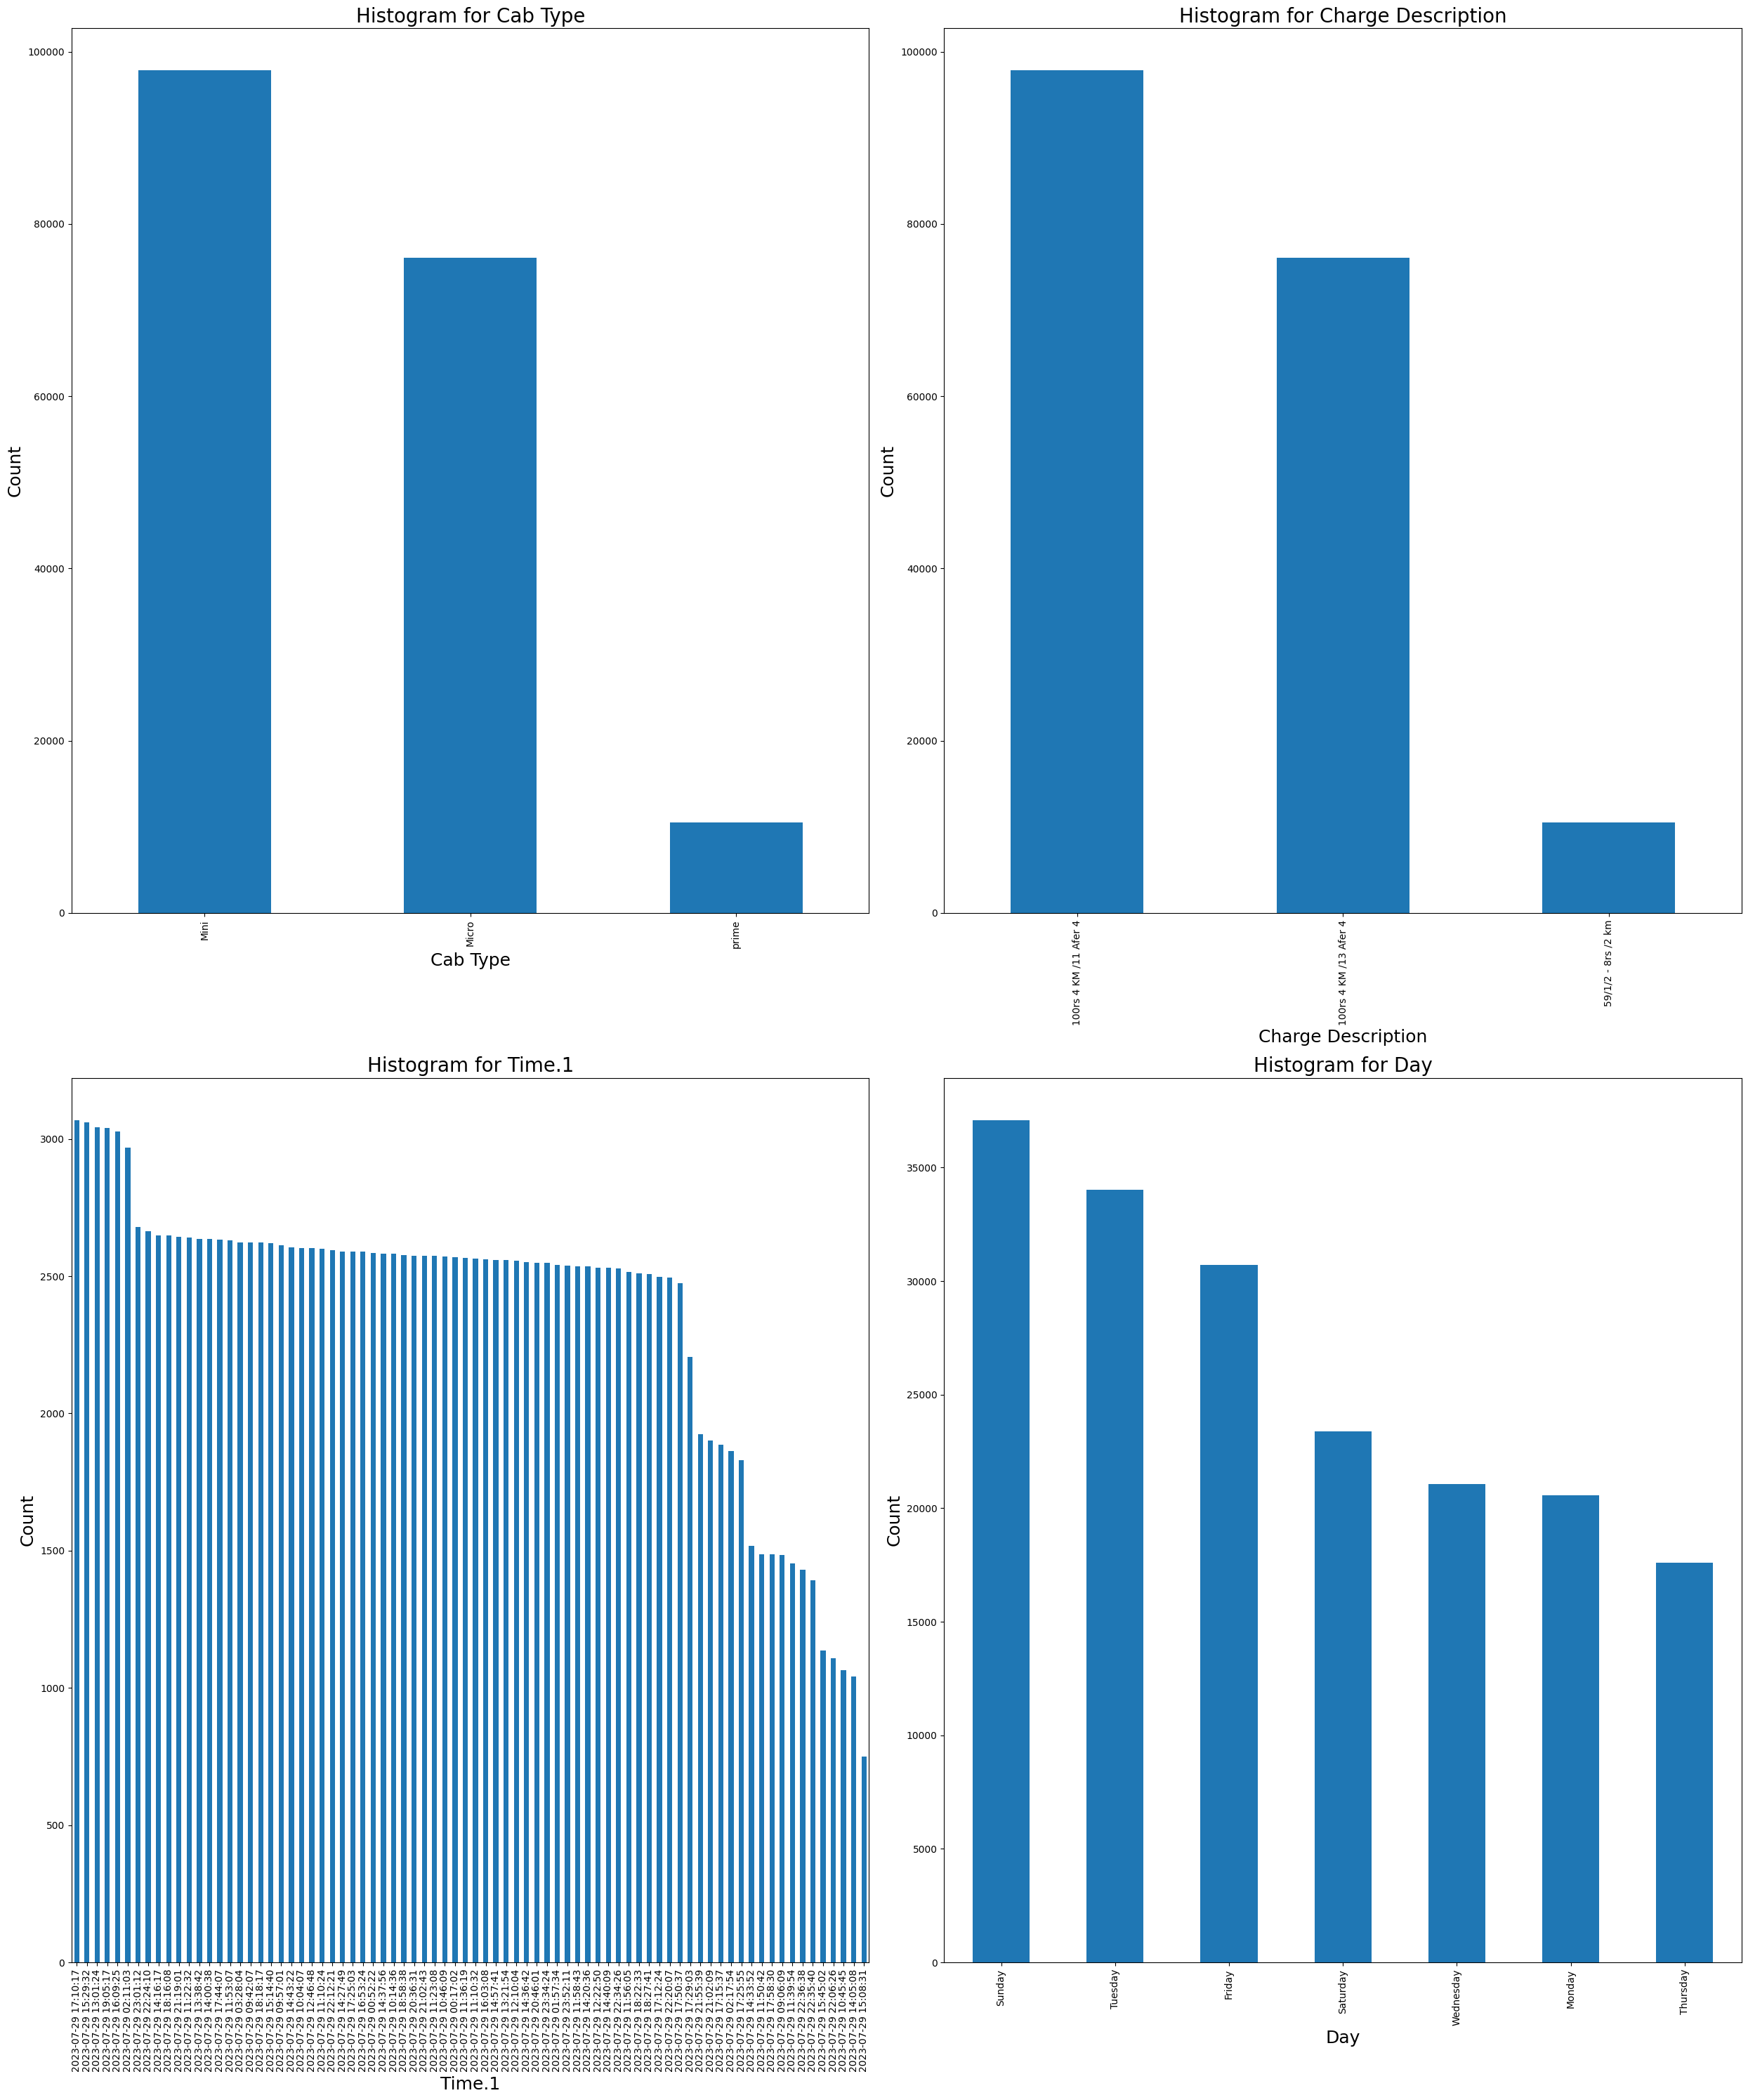

In [35]:
# Define the columns for which you want to create histograms
columns_for_histograms = data.columns

# Create a 2x3 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 30))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column and create histograms
for i, col in enumerate(columns_for_histograms):
    if (col != "City") &( col != 'State'):
      data[col].value_counts().plot.bar(ax=axes[i])
      axes[i].set_title(f'Histogram for {col}',size=20)
      axes[i].set_xlabel(col, fontsize=18)
      axes[i].set_ylabel('Count', fontsize=18)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


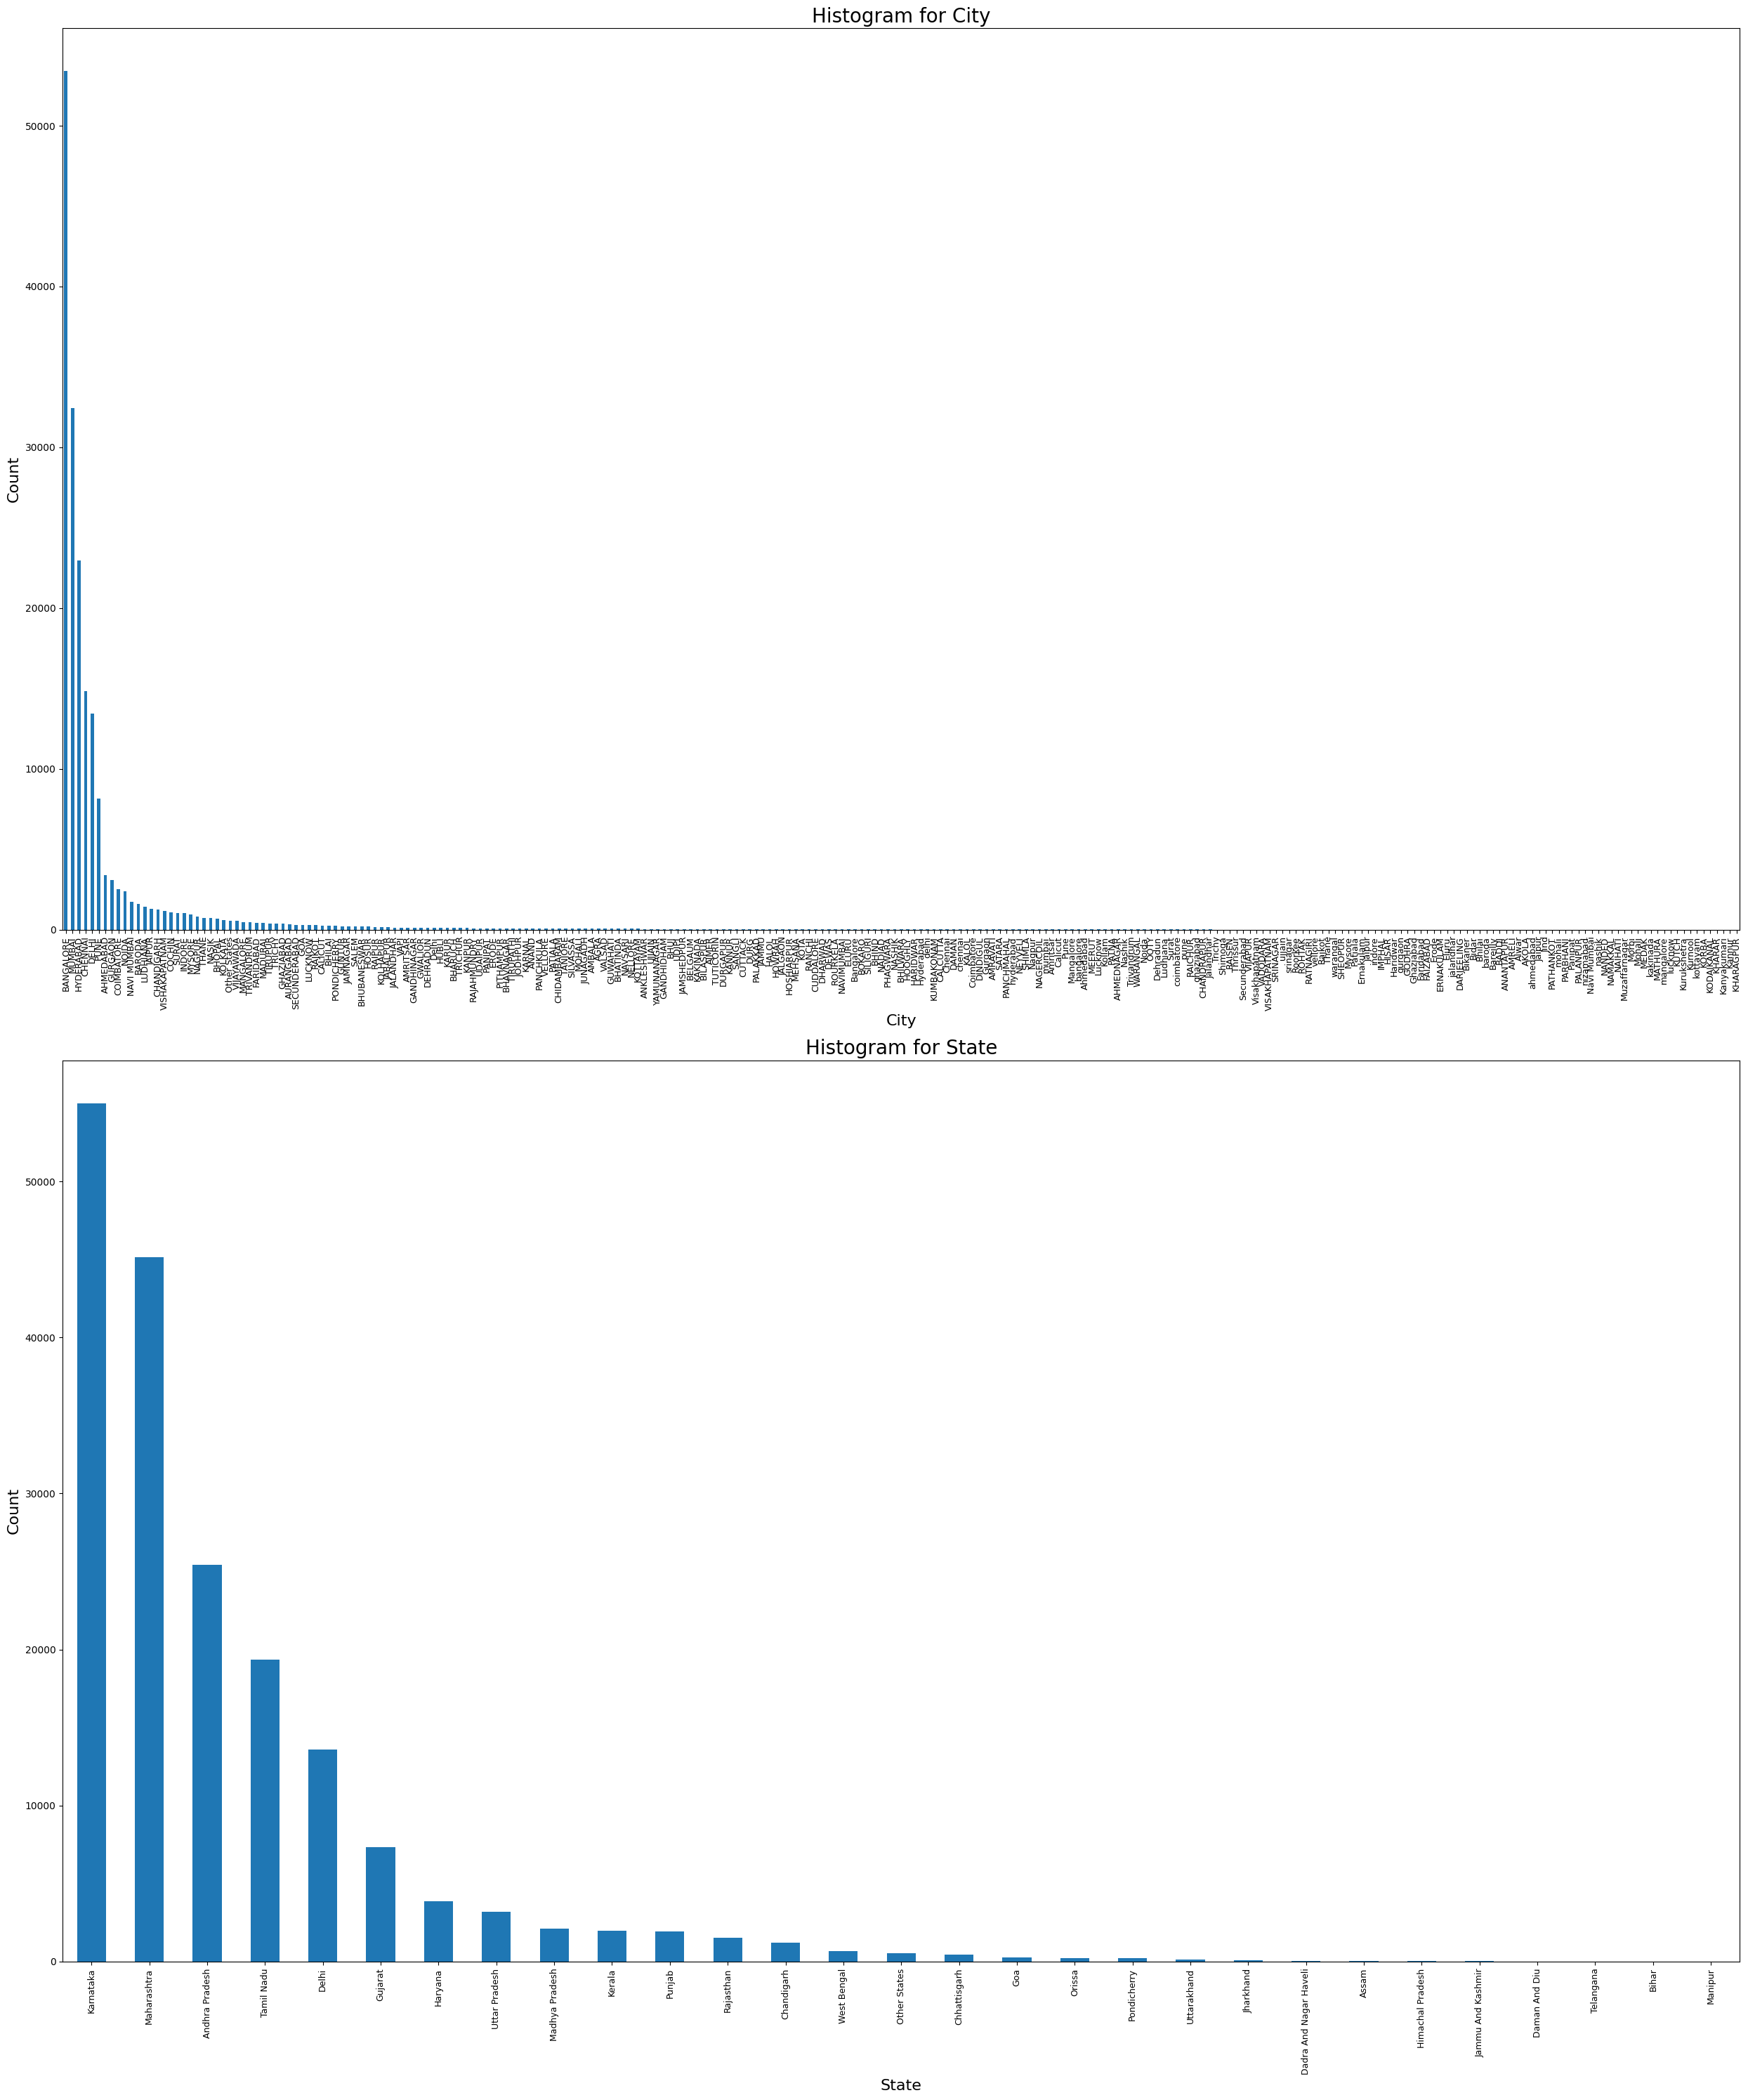

In [36]:
columns_for_histograms = ['City','State']

# Create a  subplot grid
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 30))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column and create histograms
for i, col in enumerate(columns_for_histograms):
      data[col].value_counts().plot.bar(ax=axes[i])
      axes[i].set_title(f'Histogram for {col}',size = 20)
      axes[i].set_xlabel(col,fontsize = 16)
      axes[i].set_ylabel('Count',fontsize = 16)
      axes[i].tick_params(axis='x', labelrotation=90, labelsize=9)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

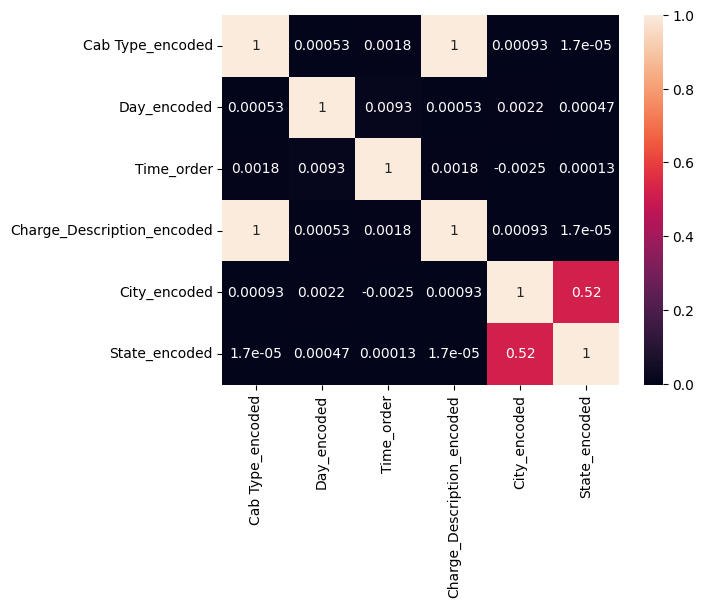

In [37]:
## Correlation matrix
import seaborn as sns

# checking correlation using heatmap

#plotting the heatmap for correlation
ax = sns.heatmap(data_encoded.corr(), annot=True)

## Market Segments

Mostly there is 4 type Market Segments
1. Geographic Segmentation
2. Demographic Segmentation
3. Psychographic Segmentation
4. Behavioral Segmentation

#### **1. Geographic Segmentation**:
Here columns "City","State" are geographic segmentation.


In [38]:
# Bar Plot of "State"
value_counts = data['State'].value_counts()

fig = px.bar(data, y= value_counts, x = value_counts.index, title=f'Bar Plot for State Counts')
fig.show()

In [39]:
# Create a bar plot using Plotly Express for "State"
value_counts = data['State'].value_counts()
fig = px.pie(data, names=value_counts.index , values= value_counts, title='Bar Plot for State Counts')

# Show all labels in the legend
fig.update_layout(legend_title_text='State')

# Show the plot
fig.show()

In [40]:
# Bar Plot of "City"
value_counts = data['City'].value_counts()

fig = px.bar(data, y= value_counts, x = value_counts.index, title=f'Bar Plot for City Counts')
fig.show()

In [41]:
# Create a bar plot using Plotly Express for "City"
value_counts = data['City'].value_counts()
fig = px.pie(data, names=value_counts.index , values= value_counts, title='Bar Plot for City Counts')

# Show all labels in the legend
fig.update_layout(legend_title_text='City')

# Show the plot
fig.show()

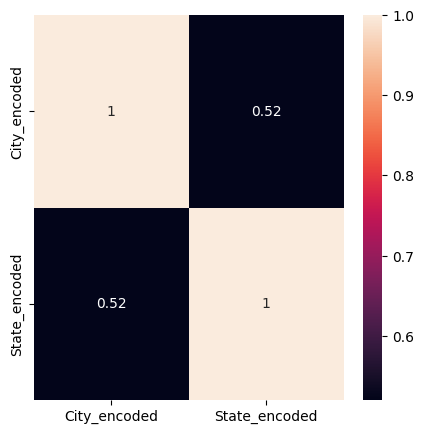

In [42]:
geographic = ['City','State']

## To see Geographic correlation
plt.figure(figsize = (5,5))
sns.heatmap(data_encoded[['City_encoded', 'State_encoded']].corr(),annot =True)
plt.show()

#### 2. Behavioral Segmentation:
Here Behavioral Segmentation are "Cab Type", "Charge Description", "Time",and "Day".

In [43]:
# Bar Plot of "Cab Type"
value_counts = data['Cab Type'].value_counts()

fig = px.bar(data, y= value_counts, x = value_counts.index, title=f'Bar Plot for Cab Type Counts')
fig.show()

In [44]:
# Create a bar plot using Plotly Express for "Cab Type"
fig = px.pie(data, names=value_counts.index , values= value_counts, title='Bar Plot for Cab Type Counts')

# Show the plot
fig.show()


In [45]:
# Bar Plot of "Charge Description"
value_counts = data['Charge Description'].value_counts()

fig = px.bar(data, y= value_counts, x = value_counts.index, title=f'Bar Plot for Charge Description Counts')
fig.show()

In [46]:
# Create a bar plot using Plotly Express for "Charge Description"
value_counts = data['Charge Description'].value_counts()
fig = px.pie(data, names=value_counts.index , values= value_counts, title='Bar Plot for Charge Description Counts')

# Show the plot
fig.show()

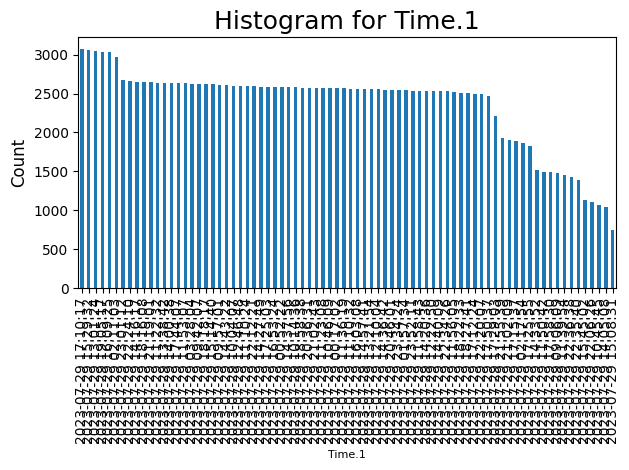

In [47]:
# Create a new figure and axes
fig, ax = plt.subplots()
col = 'Time.1'
# Plot the histogram using value_counts() and plot.bar()
data[col].value_counts().plot.bar(ax=ax)

# Set plot title, xlabel, and ylabel
ax.set_title(f'Histogram for {col}', size=18)
ax.set_xlabel(col, fontsize=8)
ax.set_ylabel('Count', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
# Create a bar plot using Plotly Express for "Time.1"
value_counts = data['Time.1'].value_counts()
fig = px.pie(data, names=value_counts.index , values= value_counts, title='Bar Plot for Time.1 Counts')

# Show the plot
fig.show()

In [49]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data['Time.1'].quantile(0.25)
Q3 = data['Time.1'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Find the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Count outliers below Q1
number =data['Time.1'] >= lower_bound

# Display the total outlier to see
print(number.sum())

176743


In [50]:
# Bar Plot of "Day"
value_counts = data['Day'].value_counts()

fig = px.bar(data, y= value_counts, x = value_counts.index, title=f'Bar Plot for Day Counts')
fig.show()

In [51]:
# Create a bar plot using Plotly Express for "Day"
value_counts = data['Day'].value_counts()
fig = px.pie(data, names=value_counts.index , values= value_counts, title='Bar Plot for Day Counts')

# Show the plot
fig.show()

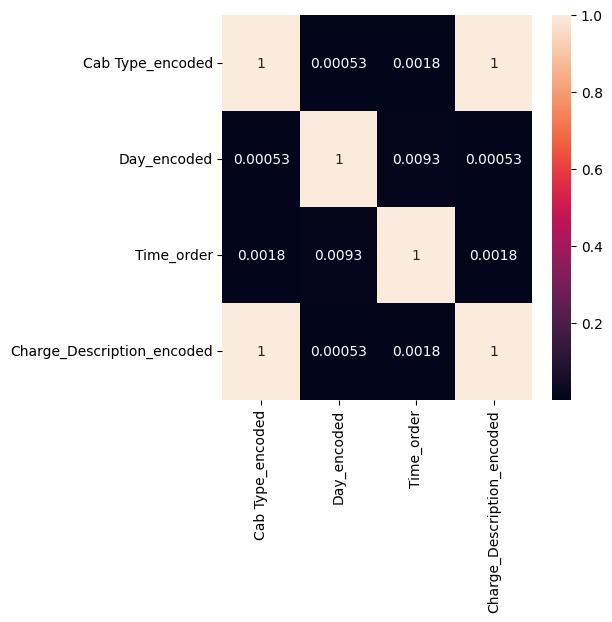

In [52]:
behavioral = ["Cab Type", "Charge Description", "Time","Day"]

## To see Geographic correlation
plt.figure(figsize = (5,5))
sns.heatmap(data_encoded[['Cab Type_encoded', 'Day_encoded', 'Time_order',
       'Charge_Description_encoded']].corr(),annot =True)
plt.show()

There are high correlation between Cab Type and Charge Description so analysing one will be sufficient compare to both.



#### 3. There is no Demographic and Psychographic segmentation in this dataset.

## APPLY MARKET SEGMENTATION
#### Find the optimal number of clusters using the Elbow Method

The elbow method is a popular technique used to determine the optimal number of clusters in a dataset for a K-means clustering algorithm. It helps to identify the point where adding more clusters does not lead to a significant improvement in the clustering performance.

Visualize the elbow plot: Use a line plot or a scatter plot to plot the number of clusters against their corresponding WCSS("within-cluster sum of squares" ). The elbow plot will show a downward-sloping curve. The "elbow" point on the curve is the optimal number of clusters, where adding more clusters does not lead to a significant decrease in WCSS.

## KModes

KModes is a clustering algorithm used in data science to group similar data points into clusters based on their categorical attributes. Unlike traditional clustering algorithms that use distance metrics, KModes works by identifying the modes or most frequent values within each cluster to determine its centroid. KModes is ideal for clustering categorical data such as customer demographics, market segments, or survey responses. It is a powerful tool for data analysts and scientists to gain insights into their data and make informed decisions.

## KModes vs KMeans
KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means. But for categorical data points, we cannot calculate the distance. So we go for KModes algorithm. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

## Scree Plot or Elbow Curve to Find Optimal Kvalue

For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters.

Select the K where you observe an elbow-like bend with a lesser cost value.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 762390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 762390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 762390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 762390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 762390.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 740249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 35581, cost: 669578.0
Init: initializing centroids
Init: initializing clusters
Startin

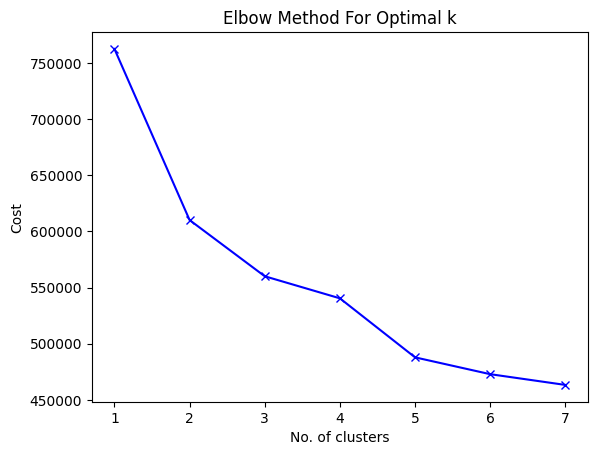

In [53]:
from kmodes.kmodes import KModes

# Elbow curve to find optimal K
cost = []
K = range(1,8)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


## Build a Model with 5 Clusters

In [60]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11706, cost: 528823.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3612, cost: 544606.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26917, cost: 541355.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18321, cost: 519749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19138, cost: 518528.0
Run 5, iteration: 2/100, moves: 8940, cost: 518528.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 16407, cost: 543165.0
Best run was number 5


array([3, 2, 2, ..., 2, 2, 2], dtype=uint16)

In [61]:
import numpy as np

# Get unique cluster assignments
unique_clusters = np.unique(clusters)

print(unique_clusters)


[0 1 2 3 4]


Finally, insert the predicted cluster values in our original dataset.

In [62]:
# Create a new DataFrame with the 'Cluster' column added
data_clusters = data.copy()
data_clusters.insert(0, 'Cluster', clusters)

# Display the new DataFrame with the 'Cluster' column
data_clusters

,Cluster,Cab Type,Charge Description,Time.1,Day,City,State
0,3,Mini,100rs 4 KM /11 Afer 4,2023-07-29 12:22:50,Friday,Mysore,Karnataka
7,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 16:09:25,Sunday,Delhi,Delhi
8,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 17:58:30,Tuesday,AGRA,Uttar Pradesh
9,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 11:22:32,Monday,AGRA,Uttar Pradesh
10,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 11:50:42,Tuesday,AGRA,Uttar Pradesh
...,...,...,...,...,...,...,...
184701,1,Micro,100rs 4 KM /13 Afer 4,2023-07-29 17:58:30,Saturday,Other States,Other States
184702,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 17:29:03,Thursday,Other States,Other States
184703,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 14:27:49,Friday,Other States,Other States
184704,2,Mini,100rs 4 KM /11 Afer 4,2023-07-29 22:35:40,Sunday,Other States,Other States


## Cluster Analysis

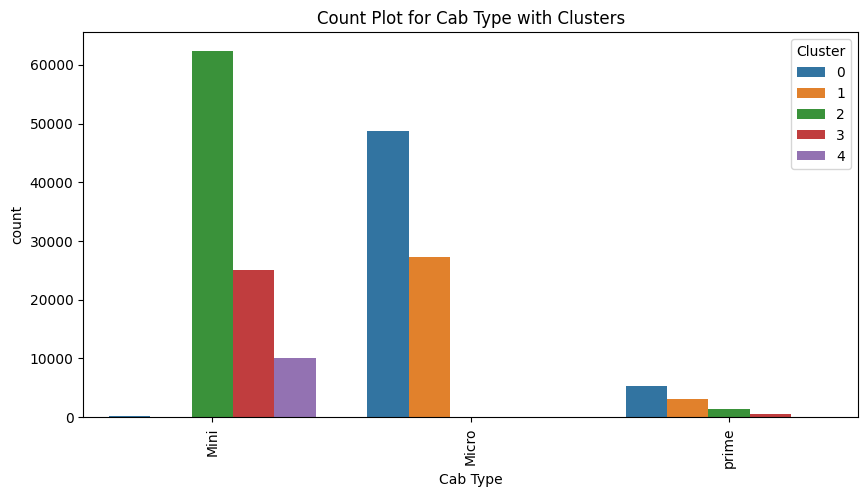

In [63]:
## Count Plot for Cab Type with Clusters
plt.figure(figsize=(10, 5))
sns.countplot(x="Cab Type", hue='Cluster', data=data_clusters)
plt.title(f'Count Plot for Cab Type with Clusters')
plt.xticks(rotation=90)
plt.show()

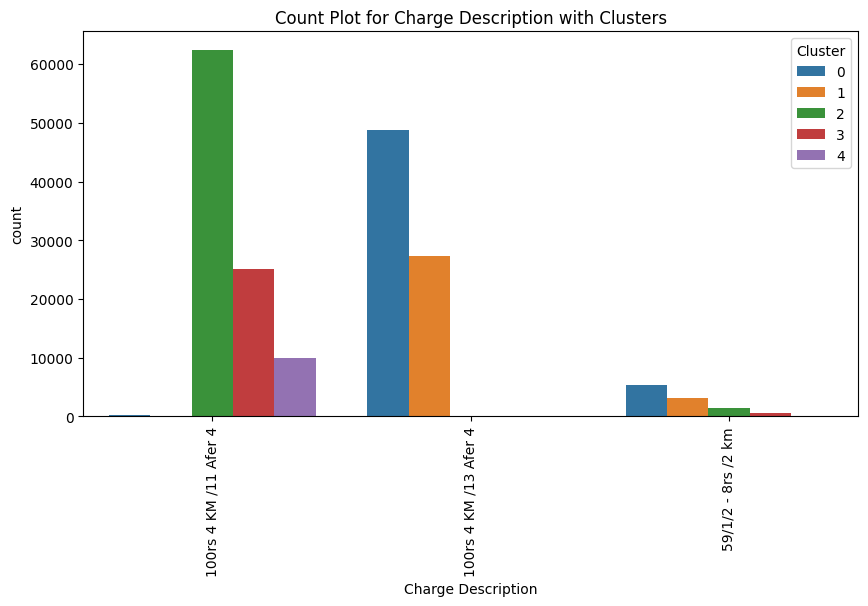

In [65]:
## Count Plot for Charge Description with Clusters

plt.figure(figsize=(10, 5))
sns.countplot(x="Charge Description", hue='Cluster', data=data_clusters)
plt.title(f'Count Plot for Charge Description with Clusters')
plt.xticks(rotation=90)
plt.show()

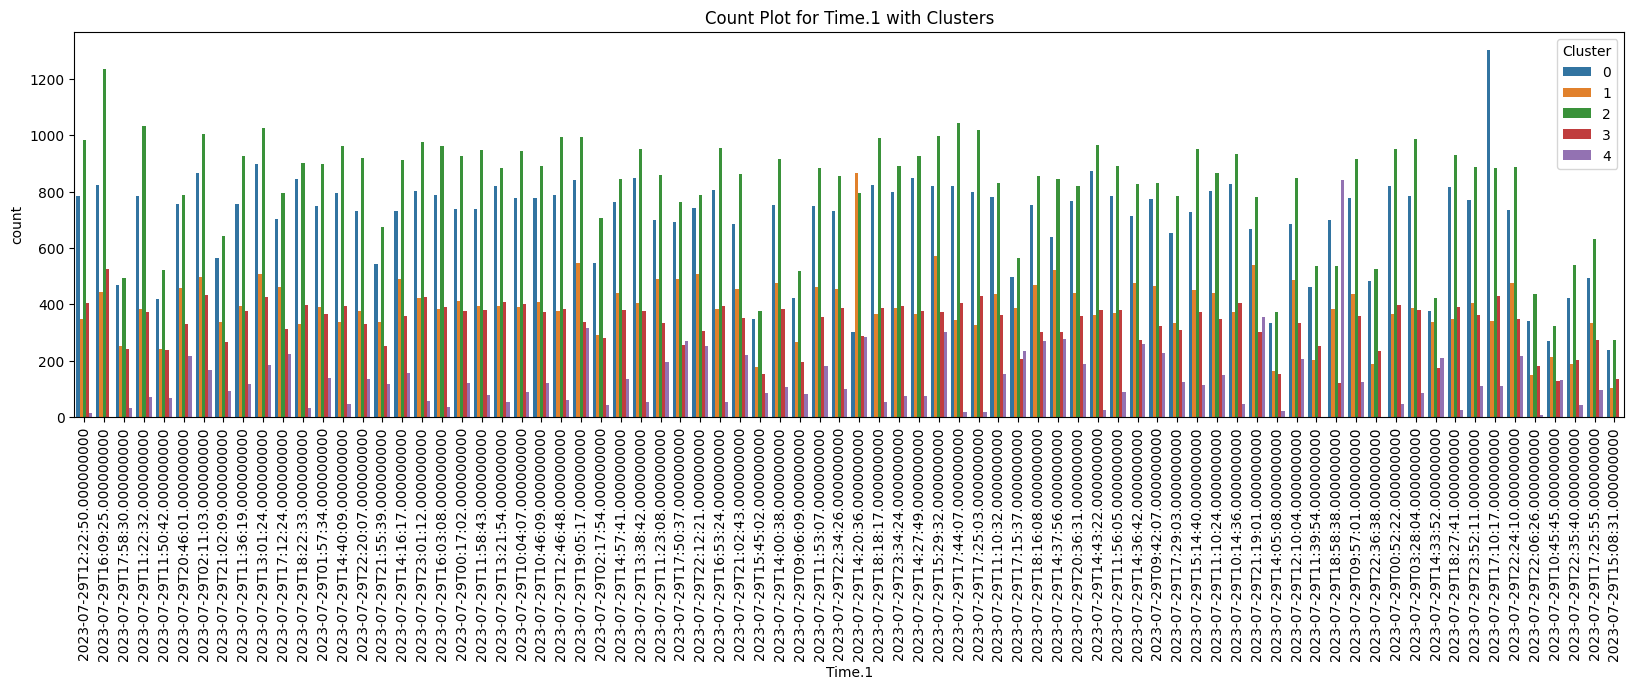

In [67]:
## Count Plot for Time.1 with Cluster

plt.figure(figsize=(20, 5))
sns.countplot(x="Time.1", hue='Cluster', data=data_clusters)
plt.title(f'Count Plot for Time.1 with Clusters')
plt.xticks(rotation=90)
plt.show()

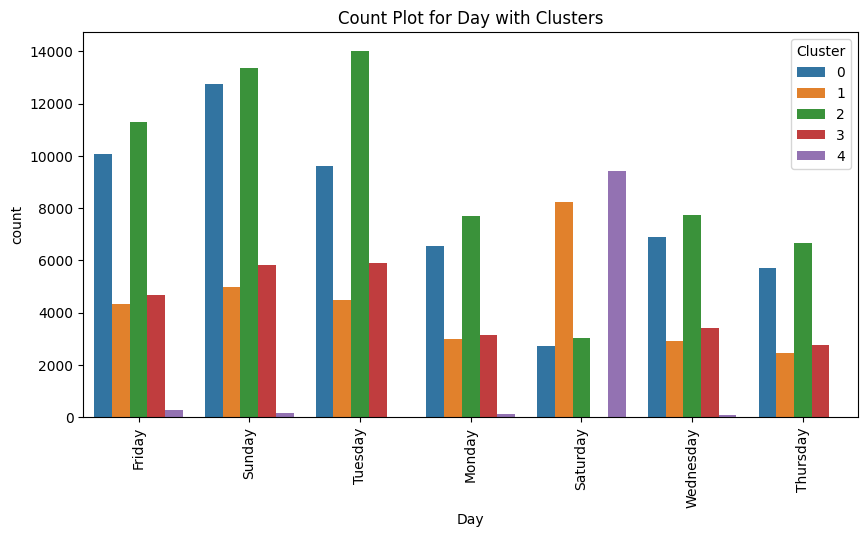

In [68]:
## Count Plot for Day with Clusters

plt.figure(figsize=(10, 5))
sns.countplot(x="Day", hue='Cluster', data=data_clusters)
plt.title(f'Count Plot for Day with Clusters')
plt.xticks(rotation=90)
plt.show()

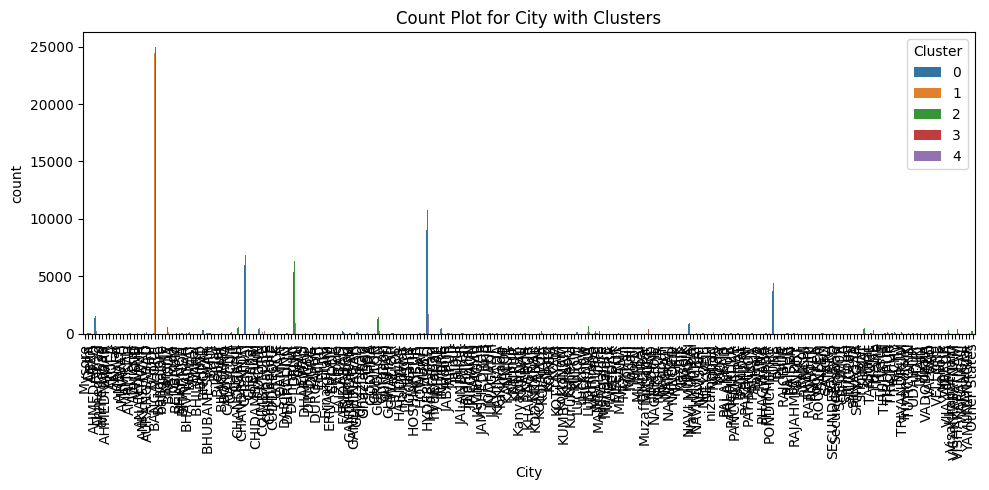

In [70]:
## Count Plot for City with Clusters

plt.figure(figsize=(10, 5))
sns.countplot(x="City", hue='Cluster', data=data_clusters)
plt.title(f'Count Plot for City with Clusters')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

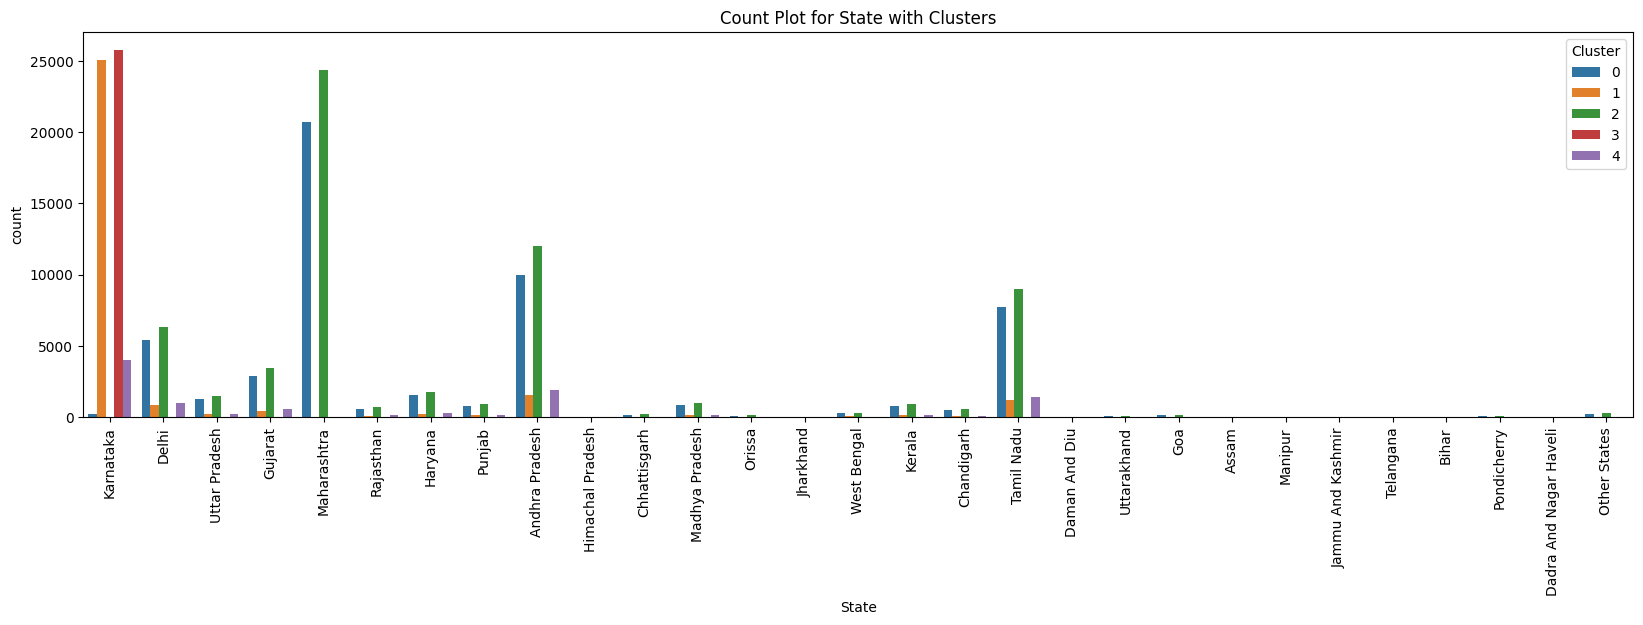

In [72]:
## Count Plot for State with Cluster
plt.figure(figsize=(20, 5))
sns.countplot(x="State", hue='Cluster', data=data_clusters)
plt.title(f'Count Plot for State with Clusters')
plt.xticks(rotation=90)
plt.show()

 # Cluster Comparison and Statistical Tests:

 Cluster comparison involves analyzing the characteristics of different clusters to identify similarities and differences between them. This helps in understanding the relationships between the categorical variables and how they contribute to the formation of distinct clusters. One way to compare clusters is by creating cross-tabulations or contingency tables between the clusters and categorical variables. We can then perform statistical tests, such as chi-square test, to check for significant differences between the clusters for each categorical variable.

In [75]:
from scipy.stats import chi2_contingency
# Create cross-tabulations between Cluster and categorical variables
cross_tabs = {}
for col in data_clusters.columns:
    if col != 'Cluster':
        cross_tabs[col] = pd.crosstab(data_clusters['Cluster'], data_clusters[col])

# Perform chi-square test for each cross-tabulation
chi2_results = {}
for col, cross_tab in cross_tabs.items():
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

# Display the chi-square test results
print("Chi-Square Test Results:")
for col, result in chi2_results.items():
    print(f"{col}:")
    print("  Chi-Square:", result['chi2'])
    print("  p-value:", result['p-value'])
    print()

Chi-Square Test Results:
Cab Type:
  Chi-Square: 176731.19237688894
  p-value: 0.0

Charge Description:
  Chi-Square: 176731.19237688888
  p-value: 0.0

Time.1:
  Chi-Square: 10170.667548261332
  p-value: 0.0

Day:
  Chi-Square: 75667.52222839168
  p-value: 0.0

City:
  Chi-Square: 156133.89132158743
  p-value: 0.0

State:
  Chi-Square: 155378.00555801968
  p-value: 0.0



# Interpretation:
You can interpret the results based on the p-values. If the p-value is less than a significance level (e.g., 0.05),
it suggests that there is a significant difference between the clusters for that categorical variable.

So here p value less than for each cluster so there is a significant difference between the clusters for that categorical variable.